#### 4.7 계단 오르내리기 예제

배열연산의 활용을 보여줄 간단한 애플리케이션이다.

계단의 중간에서 같은 확률로 한 계단 올라가거나 내려간다고 가정했을 때 1,000번 수행하는 코드는 다음처럼 작성할 수 있다.

파이썬으로 계단 오르내리기 코드 구현하기

In [54]:
import random

In [55]:
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
print(walk[:20])

[0, 1, 2, 1, 0, -1, 0, -1, 0, 1, 0, 1, 2, 3, 2, 1, 0, 1, 2, 1]


In [56]:
import matplotlib.pyplot as plt

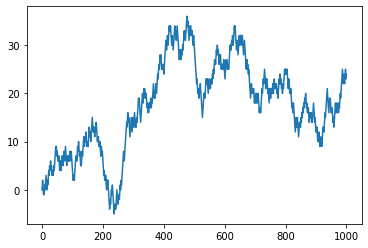

In [57]:
%matplotlib inline
plt.plot(walk)
plt.show()

창 밖에서 그리기

구글링(jupyter notebook plot not showing)

In [58]:
%matplotlib qt5
# %matplotlib tk
plt.plot(walk)
plt.show()

넘파이로 계단 오르내리기 코드 구현하기

In [59]:
import numpy as np

In [60]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [63]:
print(walk.min())
print(walk.max())

-65
11


최초로 10칸 떨어지기까지 얼마나 걸렸는지 확인해보자

최초의 10 or -10인 시점을 구해야 하므로 불리언 배열에서 최대 값의 처음 색인을 반환하는 argmax를 사용하자

In [75]:
walk
walk[:20]

array([-1,  0, -1,  0, -1,  0,  1,  2,  3,  4,  5,  6,  5,  6,  5,  6,  7,
        6,  5,  6], dtype=int32)

In [70]:
np.abs(walk)[:40]

array([ 1,  0,  1,  0,  1,  0,  1,  2,  3,  4,  5,  6,  5,  6,  5,  6,  7,
        6,  5,  6,  7,  6,  5,  6,  7,  8,  9, 10,  9, 10, 11, 10, 11, 10,
       11, 10,  9,  8,  7,  6], dtype=int32)

In [72]:
(np.abs(walk)[:40] >= 10)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False])

In [64]:
(np.abs(walk) >= 10).argmax()

27

여기서는 argmax를 사용했지만 argmax는 배열 전체를 모두 확인하기 때문에 효과적이지 않음

#### 4.7.1 한 번에 계단 오르내리기 시뮬레이션하기

계단 오르내리기를 많은 횟수, 대략 5,000회 정도 해보자

1000번 오르내리기를 5000번 실행하는 것이다.

In [91]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))  # 0 or 1
draws

array([[1, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [92]:
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,  -1, ..., -34, -33, -32],
       [  1,   2,   3, ..., -16, -15, -14],
       [  1,   0,  -1, ...,  -6,  -7,  -8],
       ...,
       [ -1,   0,  -1, ..., -28, -27, -28],
       [  1,   0,   1, ..., -10,  -9,  -8],
       [ -1,  -2,  -3, ..., -32, -31, -30]], dtype=int32)

In [93]:
print(walks.max())
print(walks.min())

116
-122


누적 합이 30 혹은 -30이 되는 최소 시점을 계산해보자

In [94]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False,  True, ..., False,  True,  True])

30 or -30에 도달한 시뮬레이션의 갯수(5000개 중에 몇 개?)

In [95]:
hits30.sum()

3420

In [101]:
np.abs(walks[hits30])  # walks에서 30 or -30 이 넘은 배열만 절댓값으로 뽑아냄

array([[ 1,  0,  1, ..., 34, 33, 32],
       [ 1,  0,  1, ...,  6,  7,  8],
       [ 1,  2,  1, ..., 36, 37, 36],
       ...,
       [ 1,  0,  1, ..., 24, 25, 24],
       [ 1,  0,  1, ..., 10,  9,  8],
       [ 1,  2,  3, ..., 32, 31, 30]], dtype=int32)

In [103]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)  # 위 배열 중 30이 넘은 최초의 값의 순번을 뽑음
crossing_times

array([661, 537, 759, ..., 675, 827, 121], dtype=int64)

평균 몇 번째에서 절댓값 30이 넘었는지 알고싶으면

In [104]:
crossing_times.mean()

507.93040935672514

정규분포 만들기(?) 같습니다. 저도 잘 모르겠습니다. 하하  
설명 링크 -> [넘파이 documents](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=random%20normal#numpy.random.normal)

loc -> Mean (“centre”) of the distribution.  
scale -> Standard deviation (spread or “width”) of the distribution. Must be non-negative.  

공부해서 알았습니다.

loc에는 평균 centre값을 설정하고(british eng)  scale에는 표준분포?를 넣습니다.

In [106]:
steps = np.random.normal(loc=0, scale=0.25, size=(nwalks, nsteps))
steps

array([[-0.10053946, -0.10764873, -0.2272261 , ...,  0.02066041,
        -0.05471051, -0.25729071],
       [-0.19626666,  0.01539763, -0.43305758, ...,  0.06699993,
        -0.4774775 , -0.01584222],
       [-0.21580589, -0.47474757, -0.15418486, ..., -0.24487176,
         0.05000981, -0.18542216],
       ...,
       [ 0.4485158 , -0.48811257,  0.58425696, ..., -0.3459173 ,
        -0.35599075, -0.31182658],
       [ 0.376187  ,  0.65238968, -0.47310877, ...,  0.54839096,
        -0.41761413, -0.38374572],
       [ 0.20466601, -0.30918149,  0.14807645, ...,  0.09402242,
        -0.16608096,  0.28867782]])

이로써 넘파이는 끝!